The periodic square wave function is defined as



$
f\left(t\right) =\begin{cases}
 -1,   &    -T/2≤t<0\\
+1,    &   0≤t<T/2
\end{cases}  
$

$f\left(t\pm nT\right)=f\left(t\right),\:n\:=\:1,\:2,\:3,\:4,\:...$

Note that, in the cycle centered on t=0, the square wave is just the sign of t. There's a python function for this (numpy sign)! For convienence, we will construct the square wave on the interval $[-T/2, +T/2]$ and assume periodicity $f(t \pm nT) = f(t)$

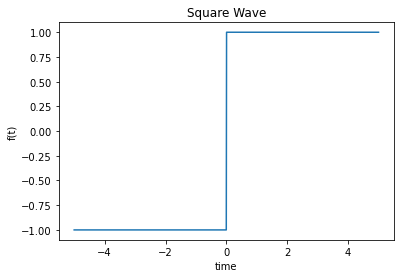

Using direct integration, we know 

$a_n=0,\:n=0,1,2,3,....$

$b_n=\frac{2}{n\pi}[1-(-1)^n],\:n=1,2,3,...  $

We can reconstruct f(t) by summing the Fourier Series

$
f(t) = \frac{1}{2}a_0+ \sum_{n=1}^{N} [ a_n cos  (\frac{n}{T}2\pi t) + b_nsin(\frac{n}{T}2\pi t) ]    
$

Use the  code below to take the numerical FFT for this function, plotting the results along with analytic for first few coefficients. There are 4 pieces to fill in (labled 1 to 4).





In [ ]:
from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e, ones, arange, zeros, real, imag, sign
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout, stem

from scipy.fft import fft, fftshift

# time dimension

T = 10 # sec
nt = 2**11 # fft likes powers of 2
dt = T/nt # time step

# 1 use arange of linspace to fill in time array t such that
#    -T/2 <= t < +T/2
t= 
nfmax = int(nt/2) # number of frequencies resolved by FFT

print(t[0],t[-1],dt)

# frequency dimension

# Create the square function in array f, matching the time array

# 2 fill in the square wave function
f =   # note that t is an array already and f is same size.

# take FFT
#  Note: We need to shift function one half period.
#   fft assumes 0<t<T
#   but we defined -T/2 <= t < +T/2
#   use fftshift to do this
F = fft(fftshift(f), nt)

# get the cos and sin coeffs
a = 2*real(F[:nfmax])/nt # form the a coefficients
a[0] = a[0]/2
b = -2*imag(F[:nfmax])/nt # form the b coefficients

# Get the analytic coefficients

# initialize to zeros
aan = zeros(nfmax)
ban = zeros(nfmax)

# 3 Fill in the math for the coefficients
for n in range(1,nfmax):
    ban[n]=

# Reconstruct the sawtooth by suming fourier series for small n

# Sum the Fourier Series
Nrecon = 10
fr = ones(nt)*a[0] # fill time series with constant term
# 4 Use a for loop to do the Fourier Sum above, for n=1...Nrecon

## make some plots

subplot(2,2,1)
plot(t,f)
plot(t,fr)
title('Function')
xlabel('time')
ylabel('f(t)')

subplot(2,2,2)
plot(t, fr-f);
title('Difference')
xlabel('time')
ylabel('Error')


subplot(2,1,2)
plot(arange(0,10),b[0:10],'b|',label='FFT')
plot(arange(0,10),ban[0:10],'r_',label='Analytic')
xlabel('Index')
legend()


tight_layout() # prevent squished plot (matplotlib kludge)
